In [3]:
#IMPORTING DATASET
import pandas as pd
import numpy as np

train = pd.read_csv("../data/train.csv")

train.head()


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
#PRINTING NUMBER OF FEATURES AND NUMBER OF ROWS
rows, cols = train.shape
print("Number of rows:", rows)
print("Number of features:", cols)

Number of rows: 101763
Number of features: 23


In [5]:
C#CHECKING FOR NULL VALUES
train.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [8]:
#PRINTING SUMMARY OF THE DATASET
from scipy.stats import zscore

# SHOW DATA TYPES
print("=== DATA TYPES ===")
print(train.dtypes)
print("\n")

# SUMMARY FOR NUMERICAL VALUES
print("=== NUMERICAL SUMMARY (describe) ===")
print(train.describe())
print("\n")


# SHOWING MISSING VALUES
print("=== MISSING VALUES ===")
print(train.isnull().sum())
print("\n")


# CHECKING FOR OUTLIERS
print("=== OUTLIERS (Z-score > 3) ===")
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

z_scores = train[numeric_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()   # outliers per column

print(outliers)
print("\n")


# SIMPLE SUMMARY TABLE
summary = pd.DataFrame({
    "Type": train.dtypes.astype(str),
    "Missing": train.isnull().sum(),
})

print("=== SIMPLE SUMMARY TABLE ===")
print(summary)


=== DATA TYPES ===
id                     int64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object


=== UNIQUE VALUES FOR CATEGORICAL FEATURES ===
=== NUMERICAL SUMMARY (describe) ===
                  id            loc           v(g)          ev(g)  \
count  101763.000000  101763.000000  101763.000000  101763.000000   
mean    50881.000000      37.347160       5.492684       2.845022   
std    

In [11]:
#CHECKING IMBALANCE
print("=== DEFECTS CLASS COUNTS ===")
print(train["defects"].value_counts())

print("\n=== DEFECTS CLASS PERCENTAGES ===")
print(train["defects"].value_counts(normalize=True) * 100)

=== DEFECTS CLASS COUNTS ===
defects
False    78699
True     23064
Name: count, dtype: int64

=== DEFECTS CLASS PERCENTAGES ===
defects
False    77.335574
True     22.664426
Name: proportion, dtype: float64


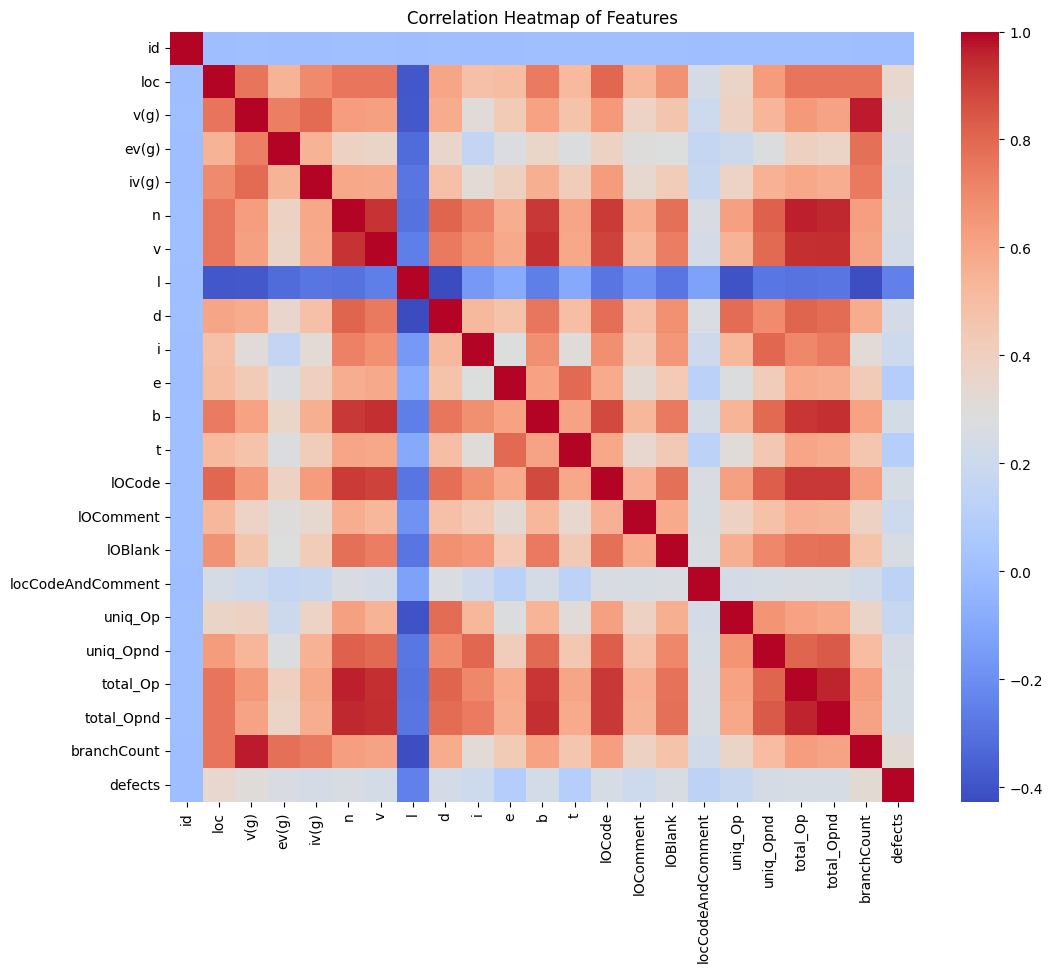

=== FEATURES MOST CORRELATED WITH TARGET ===
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
n                    0.258080
lOBlank              0.257819
l                   -0.253237
total_Opnd           0.252752
lOCode               0.250604
total_Op             0.250533
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
b                    0.232594
v                    0.231179
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
id                   0.001976
Name: defects, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#CORRELATION MATRIX FOR ALL FEATURES
corr_matrix = train.corr()

#PLOTTING HEATMAP
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

#SORTED ABSOLUTE CORRELATION WITH DEFECTS
target_corr = corr_matrix["defects"].drop("defects").sort_values(key=abs, ascending=False)
print("=== FEATURES MOST CORRELATED WITH TARGET ===")
print(target_corr)


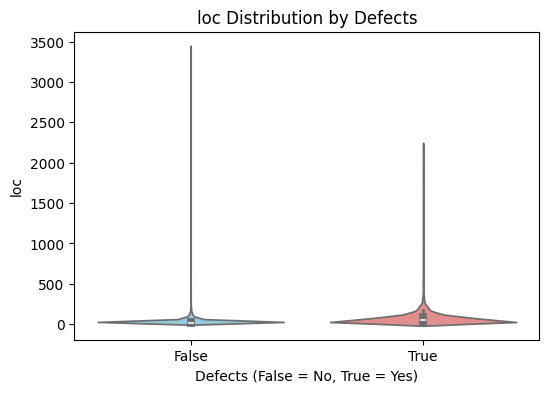

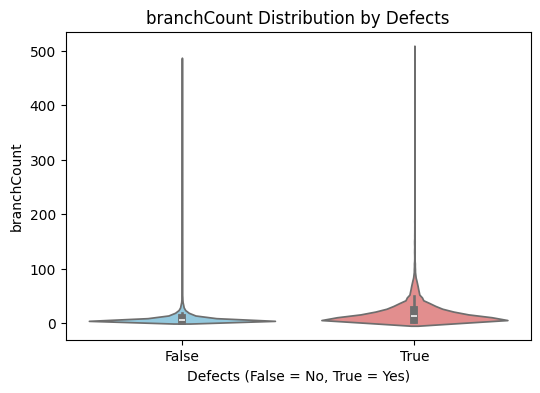

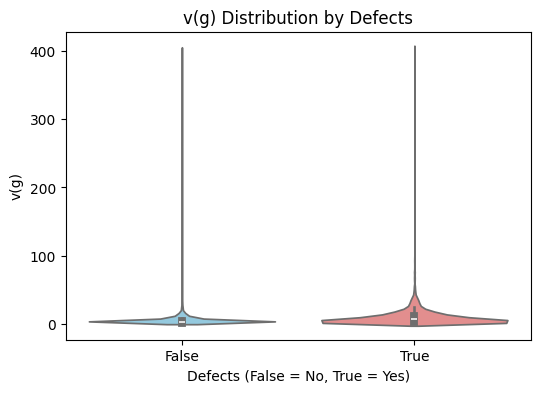

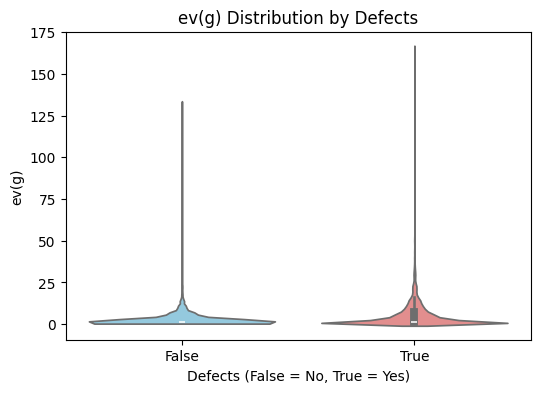

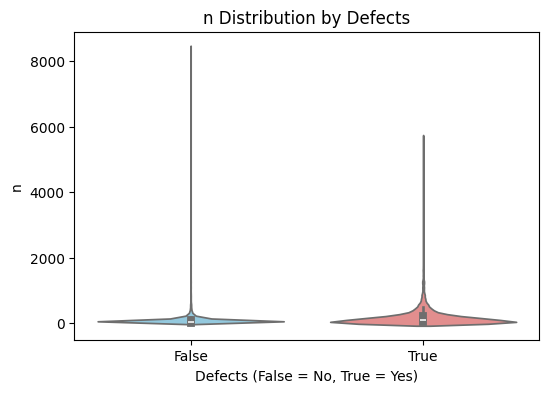

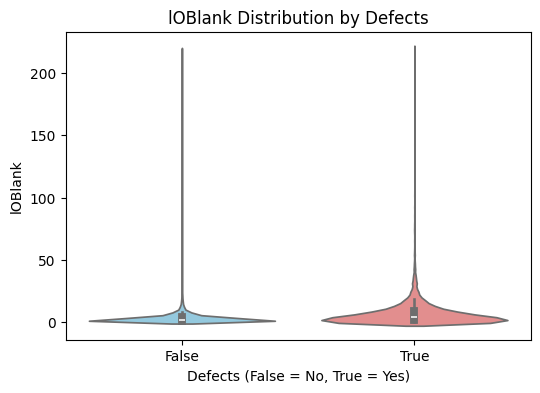

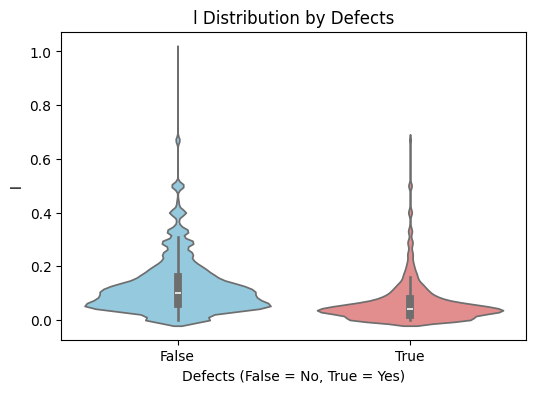

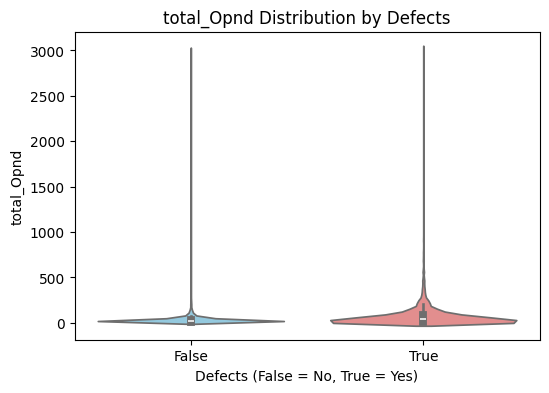

In [17]:
# List of top features correlated with target
top_features = [
    "loc", "branchCount", "v(g)", "ev(g)", "n", "lOBlank", "l", "total_Opnd"
]

# Plot violin plots
for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(
        x="defects",
        y=col,
        hue="defects",
        data=train,
        palette=["skyblue", "lightcoral"],
        legend=False
    )
    plt.title(f"{col} Distribution by Defects")
    plt.xlabel("Defects (False = No, True = Yes)")
    plt.ylabel(col)
    plt.show()
